In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_reg=pd.read_excel('data_reg.xlsx')
data_class=pd.read_excel('data_class.xlsx')
data_reg_prep=pd.read_excel('data_reg_prep.xlsx')
data_class_prep=pd.read_excel('data_class_prep.xlsx')

In [49]:
%%cmd
pip install watermark
# magic command must be put the first line of  the cell

Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

(bigdata) c:\Users\T480S\Desktop\big data\project\part C>pip install watermark

(bigdata) c:\Users\T480S\Desktop\big data\project\part C># magic command must be put the first line of  the cell


'#' is not recognized as an internal or external command,
operable program or batch file.



(bigdata) c:\Users\T480S\Desktop\big data\project\part C>

In [6]:
%%cmd
pip install tensorflow

Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

(bigdata) c:\Users\T480S\Desktop\big data\project\part C>pip install tensorflow


  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\working software\\Anaconda3\\envs\\bigdata\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




(bigdata) c:\Users\T480S\Desktop\big data\project\part C>

In [3]:

%load_ext watermark
%watermark -a "T480S" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn,tensorflow

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: T480S

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 8.13.2

numpy     : 1.25.1
pandas    : 1.5.3
matplotlib: 3.7.1
scipy     : 1.10.1
sklearn   : 1.3.0
tensorflow: 2.13.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = data_class_prep.loc[:,data_class_prep.columns != "PriceLevel"]
Y = data_class_prep.loc[:,data_class_prep.columns == "PriceLevel"]
X = X.iloc[:,0:9]
# print(X)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=0)

gs = GaussianNB().fit(Xtrain,Ytrain)
acc_score = gs.score(Xtrain,Ytrain)
print(acc_score)
acc_score = gs.score(Xtest,Ytest)
print(acc_score)
Y_pred = gs.predict(Xtest) 
print(Y_pred)
prob = gs.predict_proba(Xtest)
print(prob)
prob[1,:].sum()

0.6382252559726962
0.6370875995449374
['High' 'Low' 'Very High' 'Low' 'Low' 'High' 'Low' 'Medium' 'High' 'Low'
 'High' 'Medium' 'Very High' 'High' 'High' 'Medium' 'High' 'Low' 'High'
 'Low' 'High' 'Very High' 'Very High' 'High' 'High' 'High' 'High'
 'Very High' 'Very High' 'Very High' 'High' 'Very High' 'Low' 'Low' 'High'
 'Medium' 'High' 'High' 'Very High' 'Medium' 'Very High' 'Low' 'Medium'
 'Very High' 'Very High' 'Very High' 'High' 'Very High' 'Medium' 'High'
 'Low' 'Low' 'Medium' 'High' 'Medium' 'Low' 'Very High' 'Low' 'Low'
 'Very High' 'High' 'High' 'Low' 'Medium' 'Low' 'Medium' 'Low' 'High'
 'High' 'High' 'High' 'Medium' 'High' 'Low' 'High' 'Very High' 'Very High'
 'High' 'High' 'High' 'High' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'High'
 'Medium' 'Very High' 'High' 'Medium' 'Low' 'High' 'Very High' 'Low'
 'High' 'Medium' 'High' 'Very High' 'Very High' 'Low' 'Low' 'High'
 'Medium' 'High' 'High' 'Medium' 'High' 'High' 'Low' 'Very High' 'High'
 'Very High' 'Low' 'High' 'Low' 'Low

d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [53]:
from sklearn.naive_bayes import MultinomialNB

X = data_class_prep.loc[:,data_class_prep.columns != "PriceLevel"]
X = X.iloc[:,9:]
X.head()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=0)
mnb = MultinomialNB().fit(Xtrain, Ytrain)
mnb.class_log_prior_  #数值接近表示样本没有不平衡
mnb.class_count_


d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([513., 521., 508., 509.])

In [54]:
print(mnb.predict(Xtest))
print(mnb.predict_proba(Xtest))
print(mnb.score(Xtest,Ytest))

['Medium' 'Medium' 'Very High' 'Medium' 'Low' 'High' 'Low' 'Medium'
 'Medium' 'Medium' 'Very High' 'Medium' 'Very High' 'Medium' 'High'
 'Medium' 'High' 'Medium' 'Very High' 'Low' 'Very High' 'Very High' 'High'
 'Low' 'Very High' 'Medium' 'Very High' 'Very High' 'Very High'
 'Very High' 'Very High' 'Very High' 'Low' 'Medium' 'Very High' 'Medium'
 'High' 'High' 'Medium' 'High' 'Very High' 'High' 'Very High' 'Medium'
 'Very High' 'Very High' 'Medium' 'High' 'High' 'High' 'Medium' 'Low'
 'High' 'Very High' 'Medium' 'Low' 'Very High' 'Low' 'Low' 'Low'
 'Very High' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium' 'High'
 'Very High' 'Very High' 'High' 'Medium' 'Very High' 'Medium' 'High'
 'Very High' 'High' 'Very High' 'Medium' 'Very High' 'Medium' 'Low'
 'Medium' 'High' 'Low' 'Low' 'High' 'Medium' 'Very High' 'Very High'
 'High' 'Low' 'Medium' 'High' 'Very High' 'Low' 'Medium' 'High' 'High'
 'Very High' 'Very High' 'Low' 'Low' 'Very High' 'Medium' 'Medium'
 'Medium' 'High' 'Medium' 'Medium'

In [55]:
# 分箱操作
from sklearn.preprocessing import KBinsDiscretizer
X = data_class.loc[:,data_class.columns != "PriceLevel"]
X1 = X.iloc[:,0:9]
print(X1.head())
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=0)
from scipy.sparse import csr_matrix
kbs = KBinsDiscretizer(n_bins=5,encode="onehot").fit(X1)
X1_ = kbs.transform(X1) #把X的前半段的连续型变量转换成onehot
df = pd.DataFrame.sparse.from_spmatrix(X1_)
print(df.head())
X2 = data_class_prep.loc[:,data_class_prep.columns != "PriceLevel"]
X = pd.concat((df, X2.iloc[:,9:]),axis = 1)
X.columns = X.columns.astype(str)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=0)
print(Xtrain)
print(Ytrain)

d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(


   LotArea  YearBuilt  MasVnrArea  Fireplaces  GarAreaPerCar  \
0    31770       1960         112           2          264.0   
1    11622       1961           0           0          730.0   
2    14267       1958         108           0          312.0   
3    11160       1968           0           2          261.0   
4    13830       1997           0           1          241.0   

   GrLivAreaPerRoom  TotalHouseSF  TotalFullBath  TotalPorchSF  
0        236.571429          2736              2            62  
1        179.200000          1778              1           120  
2        221.500000          2658              1            36  
3        263.750000          4220              3             0  
4        271.500000          2557              2            34  
    0    1    2    3    4    5    6    7    8    9   ...   27   28   29   30  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.

        0    1    2    3    4    5    6    7    8    9  ...  \
1928  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...   
2497  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   
261   0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   
1775  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2587  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
763   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   
835   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...   
1653  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   
2607  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...   
2732  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1928                      0                      0                     0   
2497                      0                      0                     0   
261            

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in Ytrain.columns:
        Ytrain[column] = label_encoder.fit_transform(Ytrain[column])
for column in Ytest.columns:
        Ytest[column] = label_encoder.fit_transform(Ytest[column])

Xtrain = Xtrain.values
Xtest = Xtest.values
Ytrain = Ytrain.values
Ytest = Ytest.values
mnb = MultinomialNB(alpha=1).fit(Xtrain, Ytrain)
mnb.class_log_prior_  #数值接近表示样本没有不平衡
mnb.class_count_
print(mnb.predict(Xtest))
print(mnb.predict_proba(Xtest))
print(mnb.score(Xtest,Ytest))
print(mnb.score(Xtrain,Ytrain))





[2 2 3 2 1 0 1 2 2 1 0 2 3 2 0 2 0 1 0 1 3 3 0 2 0 2 3 3 3 3 3 3 1 1 0 2 0
 0 2 0 3 2 3 0 3 3 2 3 2 0 2 1 2 3 2 1 3 1 1 2 3 0 1 1 2 2 2 0 0 0 0 1 0 2
 0 3 0 3 2 3 2 1 2 2 1 1 2 2 3 3 0 1 2 0 3 1 2 0 0 3 3 1 1 3 2 2 0 0 2 2 1
 0 0 3 1 3 1 2 2 1 1 2 3 0 0 0 3 3 3 2 3 0 1 3 2 1 3 2 3 0 1 0 3 2 2 0 0 0
 1 2 0 2 0 0 2 2 1 3 3 0 1 0 1 2 2 2 1 0 1 2 0 1 3 0 3 3 2 3 0 2 2 3 0 3 1
 2 0 1 0 3 0 0 2 2 3 2 2 3 3 1 0 1 0 3 3 0 2 3 0 2 3 3 1 0 2 0 1 0 2 2 2 2
 3 2 3 0 3 3 0 3 1 0 2 1 2 2 2 1 1 1 1 2 1 3 2 1 1 3 0 3 2 1 1 1 2 2 2 0 2
 2 2 3 3 0 0 0 2 3 3 0 2 1 2 2 0 3 0 1 3 2 2 2 1 1 0 3 2 0 2 0 2 1 1 1 1 2
 3 0 0 0 3 1 0 1 0 2 3 1 3 1 3 0 2 1 0 1 3 2 3 0 1 1 2 2 1 3 1 1 3 1 0 2 2
 3 2 0 2 1 1 2 3 2 1 1 0 1 2 0 0 0 2 0 2 0 0 0 0 0 0 3 3 0 1 3 1 2 1 3 1 2
 2 3 3 1 0 3 2 0 2 3 0 2 1 0 2 2 3 1 1 3 3 2 0 1 2 2 1 3 3 2 1 2 3 2 0 3 0
 1 2 3 1 2 0 3 1 3 2 2 1 3 3 3 2 0 2 1 0 3 2 3 1 1 2 1 2 2 3 2 3 2 1 0 3 0
 0 2 1 0 1 2 1 2 1 1 2 1 3 1 1 0 2 0 0 0 1 1 2 2 3 0 0 1 3 3 2 2 3 3 0 3 1
 0 1 0 2 2 2 3 3 3 1 0 0 

d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
print(mnb.score(Xtest,Ytest))
print(mnb.score(Xtrain,Ytrain))

0.7360637087599545
0.7147732813261823


In [72]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold,validation_curve,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

kf = KFold(n_splits=5, shuffle=True, random_state=0)


parameters = {'alpha':np.arange(0.0001,0.2,0.005)}
MNB = MultinomialNB()
GS_acc = GridSearchCV(MNB, parameters, cv=kf, scoring="accuracy")
GS_acc.fit(Xtrain, Ytrain)
GS_recall = GridSearchCV(MNB, parameters, cv=kf, scoring="recall_macro")
GS_recall.fit(Xtrain, Ytrain)
GS_roc = GridSearchCV(MNB, parameters, cv=kf, scoring="roc_auc_ovr")
GS_roc.fit(Xtrain, Ytrain)

 
print(GS_acc.best_params_)
print(GS_acc.best_score_)

d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed w

{'alpha': 0.0101}
0.7025861966648863


d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
results_acc = GS_acc.cv_results_
mean_acc = results_acc['mean_test_score']

results_recall = GS_recall.cv_results_
mean_recall = results_recall['mean_test_score']

results_roc = GS_roc.cv_results_
mean_roc = results_roc['mean_test_score']

alpha= np.arange(0.0001,0.2,0.005)

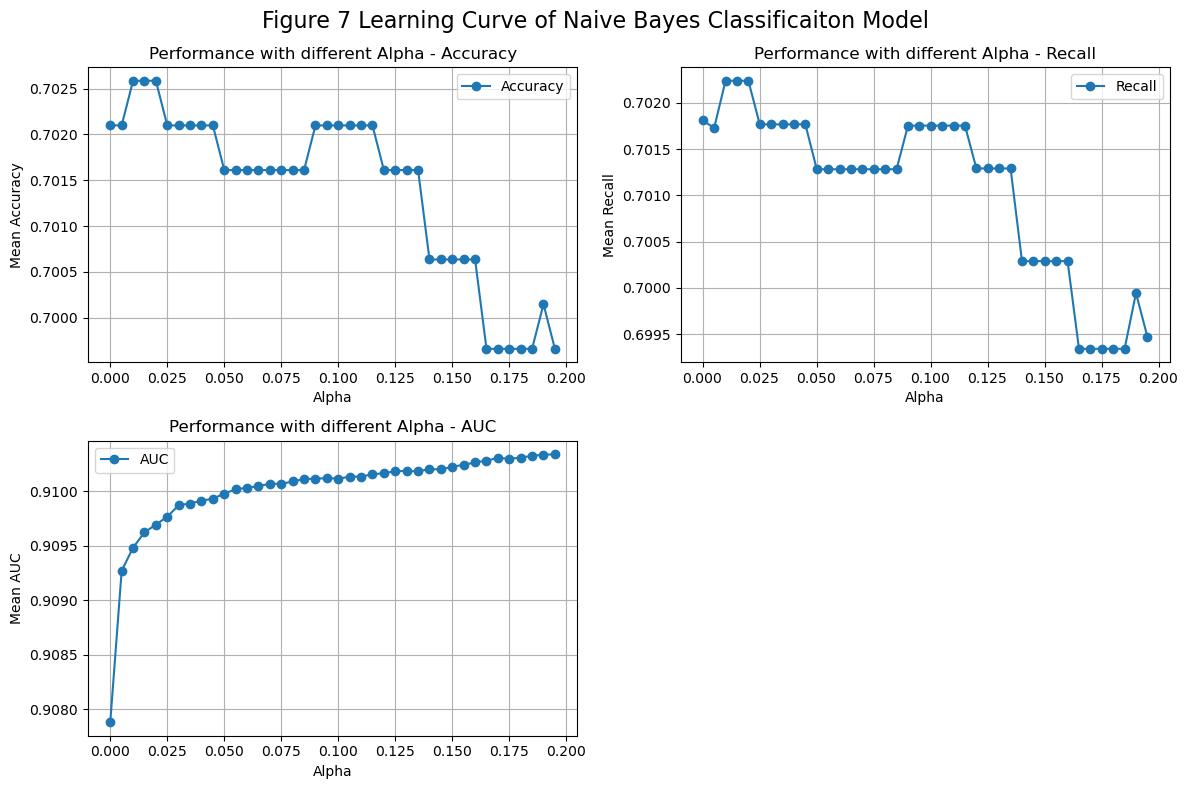

0.7025861966648863 0.7022403600969744 0.9094825989817329


In [93]:

alpha = np.arange(0.0001, 0.2, 0.005)

plt.figure(figsize=(12,8))
plt.suptitle('Figure 7 Learning Curve of Naive Bayes Classificaiton Model', fontsize=16)
# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(alpha, mean_acc, label='Accuracy', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.title('Performance with different Alpha - Accuracy')
plt.legend()
plt.grid()

# Recall plot
plt.subplot(2, 2, 2)
plt.plot(alpha, mean_recall, label='Recall', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Recall')
plt.title('Performance with different Alpha - Recall')
plt.legend()
plt.grid()

# AUC plot
plt.subplot(2, 2, 3)
plt.plot(alpha, mean_roc, label='AUC', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean AUC')
plt.title('Performance with different Alpha - AUC')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(mean_acc[np.argmax(mean_acc)],mean_recall[np.argmax(mean_acc)],mean_roc[np.argmax(mean_acc)])

In [87]:
print(mean_acc[np.argmax(mean_acc)],mean_recall[np.argmax(mean_acc)],mean_roc[np.argmax(mean_acc)])

2

In [113]:
parameters = {'alpha':[0.0101]}
MNB = MultinomialNB()
GS_acc = GridSearchCV(MNB, parameters, cv=kf, scoring="accuracy")
GS_acc.fit(Xtrain, Ytrain)
GS_recall = GridSearchCV(MNB, parameters, cv=kf, scoring="recall_macro")
GS_recall.fit(Xtrain, Ytrain)
GS_roc = GridSearchCV(MNB, parameters, cv=kf, scoring="roc_auc_ovr")
GS_roc.fit(Xtrain, Ytrain)
results_acc = GS_acc.cv_results_
mean_acc = results_acc['mean_test_score']

results_recall = GS_recall.cv_results_
mean_recall = results_recall['mean_test_score']

results_roc = GS_roc.cv_results_
mean_roc = results_roc['mean_test_score']
print(mean_acc[np.argmax(mean_acc)],mean_recall[np.argmax(mean_acc)],mean_roc[np.argmax(mean_acc)])

0.7025861966648863 0.7022403600969744 0.9094825989817329


d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed w

In [108]:
len(Xtrain)

2051

In [114]:
parameters = {'alpha':[0.0101]}
MNB = MultinomialNB()
GS_acc = GridSearchCV(MNB, parameters, cv=kf, scoring="accuracy")
GS_acc.fit(Xtest, Ytest)
GS_recall = GridSearchCV(MNB, parameters, cv=kf, scoring="recall_macro")
GS_recall.fit(Xtest, Ytest)
GS_roc = GridSearchCV(MNB, parameters, cv=kf, scoring="roc_auc_ovr")
GS_roc.fit(Xtest, Ytest)
results_acc = GS_acc.cv_results_
mean_acc = results_acc['mean_test_score']

results_recall = GS_recall.cv_results_
mean_recall = results_recall['mean_test_score']

results_roc = GS_roc.cv_results_
mean_roc = results_roc['mean_test_score']
print(mean_acc[np.argmax(mean_acc)],mean_recall[np.argmax(mean_acc)],mean_roc[np.argmax(mean_acc)])

0.7337402597402598 0.732082504231094 0.9134039720279091


d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\working software\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed w